<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries

from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from google.colab import drive  
#import pycountry
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import itertools
from nltk.corpus import stopwords
import nltk
import re

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/new_datasets'

Mounted at /content/gdrive


In [5]:
airline = pd.read_csv("./gdrive/My Drive/datasets/new_datasets/airline_classified.csv")

In [6]:
airline.sample(5)

,Unnamed: 0,Unnamed: 0.1,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment,reason
894,894,619,1333891949854666752,2020-12-01 21:53:18,"['flight', 'peak', 'covid', 'pandemic', 'even'...",0,False,NaN,en,Qatar airways,flight peak covid pandemic even asked wear mask,0.000,0.0,Neutral,[]
1106,1106,243,1335586958127624193,2020-12-06 14:08:39,"['airway', 'future', 'customer', 'stop', 'repl...",1,False,NaN,en,British airways,airway future customer stop replying never refund,0.125,0.0,Neutral,[]
714,714,221,1336343862042742786,2020-12-08 16:16:19,"['qatarairways', 'employee', 'raised', 'suppor...",101,False,"Doha, Qatar",en,Qatar airways,qatarairways employee raised support qatarcanc...,0.000,0.0,Neutral,[]
469,469,160,1335796781179830272,2020-12-07 04:02:25,"['turkey', 'desperate', 'boycott', 'turkey', '...",3,False,GAVURISTAN,en,Turkish airlines,turkey desperate boycott turkey nice untilthey...,1.000,0.0,Neutral,"['desperate', 'nice']"
740,740,276,1336055522454347778,2020-12-07 21:10:33,"['need', 'internationally', 'qsuite', 'qatarai...",0,False,New York City,en,Qatar airways,need internationally qsuite qatarairways business,0.000,0.0,Neutral,[]


#EDA

In [ ]:
airline.shape

(1857, 15)

In [ ]:
airline.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'tweet_id', 'created_at', 'text', 'likes',
       'retweeted', 'location', 'language', 'airline', 'string_text',
       'subjectivity', 'polarity', 'sentiment', 'reason'],
      dtype='object')

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1857 non-null   int64  
 1   Unnamed: 0.1  1857 non-null   int64  
 2   tweet_id      1857 non-null   int64  
 3   created_at    1857 non-null   object 
 4   text          1857 non-null   object 
 5   likes         1857 non-null   int64  
 6   retweeted     1857 non-null   bool   
 7   location      1388 non-null   object 
 8   language      1857 non-null   object 
 9   airline       1857 non-null   object 
 10  string_text   1855 non-null   object 
 11  subjectivity  1857 non-null   float64
 12  polarity      1857 non-null   float64
 13  sentiment     1857 non-null   object 
 14  reason        1855 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(8)
memory usage: 205.0+ KB


#Checking missing values

In [ ]:
airline.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
tweet_id          0
created_at        0
text              0
likes             0
retweeted         0
location        469
language          0
airline           0
string_text       2
subjectivity      0
polarity          0
sentiment         0
reason            2
dtype: int64

**remove uninforamative variables**

In [ ]:
airline = airline.drop(['Unnamed: 0','Unnamed: 0.1','language', 'created_at', 'location'], axis=1)

In [ ]:
#remove na rows
airline.dropna(inplace=True)

In [ ]:
#Check for missing values
airline.isna().sum()

tweet_id        0
text            0
likes           0
retweeted       0
airline         0
string_text     0
subjectivity    0
polarity        0
sentiment       0
reason          0
dtype: int64

In [ ]:
airline.sample(5)

,tweet_id,text,likes,retweeted,airline,string_text,subjectivity,polarity,sentiment,reason
385,1334574177987272704,"['morning', 'final', 'virgin', 'atlantic', 'bo...",0,False,Virgin Atlantic,morning final virgin atlantic boeing gvxlg lef...,0.500000,0.00,Neutral,[]
990,1336663703194923011,"['fantastic', 'news', 'airport', 'great', 'ass...",0,False,British airways,fantastic news airport great asset future area...,0.591667,0.40,Positive,"['fantastic', 'great']"
266,1336683489433935881,"['contest', 'bias', 'since', 'make', 'sure', '...",0,False,Virgin Atlantic,contest bias since make sure andraro paint loo...,0.894444,0.55,Positive,"['sure', 'amazing']"
1501,1334465152763224064,"['american', 'airline', 'maintenance', 'team',...",7,False,American airlines,american airline maintenance team scrambling c...,0.200000,0.05,Positive,['complete']
24,1335851653120057346,"['month', 'salary', 'water', 'electricity', 'h...",1,False,Saudia airlines,month salary water electricity huta marine gro...,0.000000,0.00,Neutral,[]


#Pair plot

There is a relation between likes and subjectivity and polarity.

There is a relation between subjectivity and polarity.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


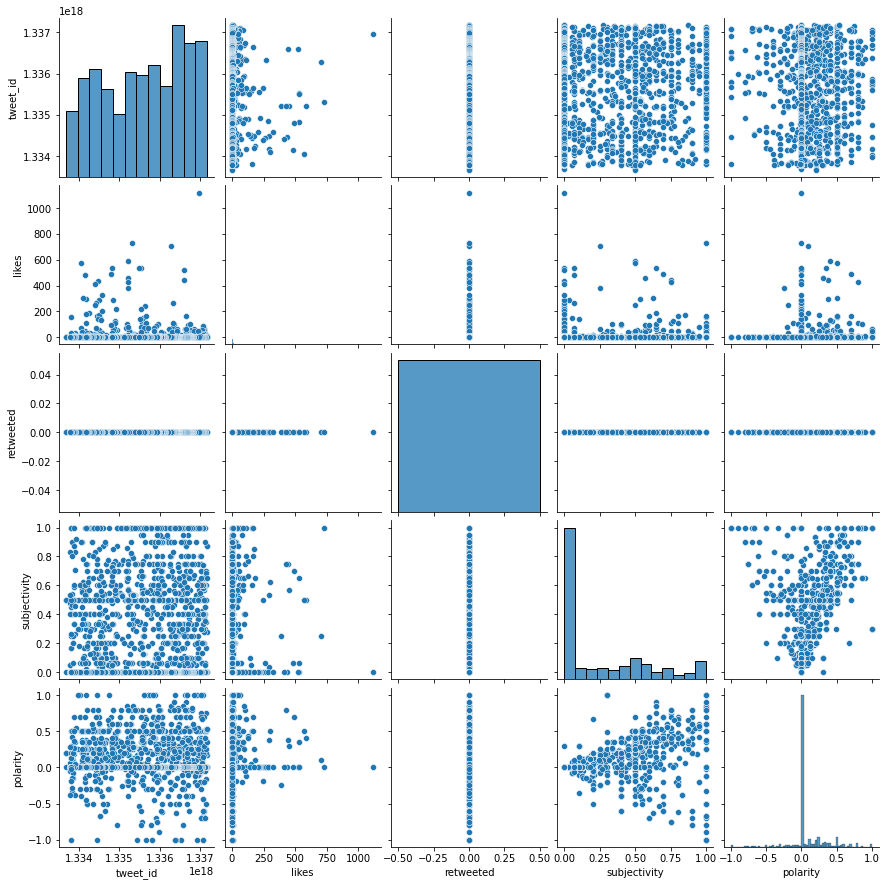

In [ ]:
sns.pairplot(airline, size = 2.5)
plt.show()

Describe

#filter only positive and negative 

In [ ]:
#filter only pos and neg 
airline = airline[(airline.sentiment == "Positive") | (airline.sentiment == "Negative")]
airline.sample(5)

,tweet_id,text,likes,retweeted,airline,string_text,subjectivity,polarity,sentiment,reason
725,1336272918553251841,"['shameful', 'stoop', 'kind', 'compassionate',...",0,False,Qatar airways,shameful stoop kind compassionate employee wan...,0.900000,0.600000,Positive,['kind']
1805,1335712796441501703,"['aircanada', 'seek', 'temporary', 'english', ...",0,False,Air Canada,aircanada seek temporary english french transl...,0.183333,0.116667,Positive,['full']
841,1334810012238004224,"['justice', 'female', 'victim', 'qatarairways'...",2,False,Qatar airways,justice female victim qatarairways qatar must ...,0.105556,0.008333,Positive,"['victim', 'action']"
224,1334183997258297344,"['united', 'airline', 'announced', 'wont', 're...",0,False,United Airlines,united airline announced wont restart flight y...,0.600000,-0.300000,Negative,['late']
428,1337155004524793857,"['previously', 'postponed', 'turkish', 'airlin...",0,False,Turkish airlines,previously postponed turkish airline euroleagu...,0.166667,-0.166667,Negative,['previously']


In [ ]:
airline.columns

Index(['tweet_id', 'likes', 'retweeted', 'airline', 'string_text',
       'subjectivity', 'polarity', 'sentiment', 'reason'],
      dtype='object')

In [ ]:
#save them first because without saving it, it will cause me issues later
airline.to_csv('airline_drop.csv')
!cp airline_drop.csv "./gdrive/My Drive/datasets/new_datasets/"

In [7]:
#read
airline = pd.read_csv("./gdrive/My Drive/datasets/new_datasets/airline_drop.csv")

In [8]:
airline.shape

(787, 11)

In [9]:
airline.sample(5)

,Unnamed: 0,tweet_id,text,likes,retweeted,airline,string_text,subjectivity,polarity,sentiment,reason
308,695,1336573226118508544,"['airline', 'contract', 'worthless', 'paper', ...",0,False,Qatar airways,airline contract worthless paper rule whoever ...,0.900000,-0.800000,Negative,['worthless']
91,212,1334513767883956227,"['debuted', 'award', 'winning', 'inflight', 'e...",0,False,United Airlines,debuted award winning inflight entertainment w...,0.541667,0.250000,Positive,['winning']
354,794,1335579930063585282,"['obvious', 'qatar', 'quite', 'misogynistic', ...",0,False,Qatar airways,obvious qatar quite misogynistic country think...,0.450000,-0.133333,Negative,['thin']
119,269,1336659867231260672,"['virginatlantic', 'resumed', 'flight', 'manch...",1,False,Virgin Atlantic,virginatlantic resumed flight manchester barba...,0.333333,0.250000,Positive,['first']
621,1429,1335343247028342784,"['americanairlines', 'help', 'keep', 'approved...",0,False,American airlines,americanairlines help keep approved covid vacc...,0.535714,0.285714,Positive,"['safely', 'right']"


In [13]:
color_list = ['#1a9850',
              '#d73027']

In [15]:
one_color = ['#2166ac']

#Count positive and negative sentiment

the pie chart shows that most of the sentiment are positive with almost 78% and roughly 22% of the tweets are negative. Therefore, thte majority of people are feeling satsfied about the 11 airlines.

In [11]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, colors = color_list,startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

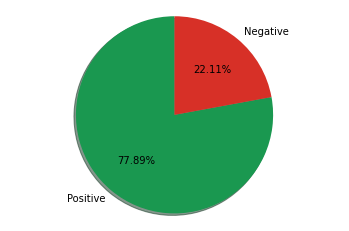

In [14]:
createPieChartFor(airline.sentiment)

#Count airlines


the diagram illustrates the number of tweets for each airline in one week. It is clear that the highest number of tweets are in Qatar airways, British airways, and American airlines. In the other hand, the lowest number of tweets are in fly Dubai, Singapore airlines, and Saudia airlines.

In [83]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

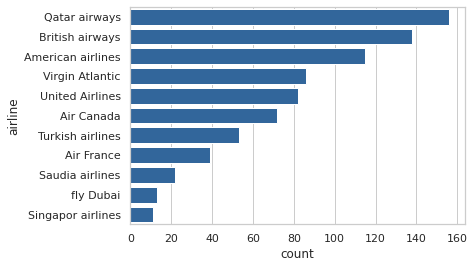

In [85]:
#sort without colors
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=airline, palette= one_color, order = airline['airline'].value_counts().index)


**The number of positive and negative tweets per airline**

In [ ]:
#airline_sentiment_df = airline.groupby(['airline','sentiment']).sentiment.count().unstack()
#airline_sentiment_df.plot(kind='bar', color = color_list)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

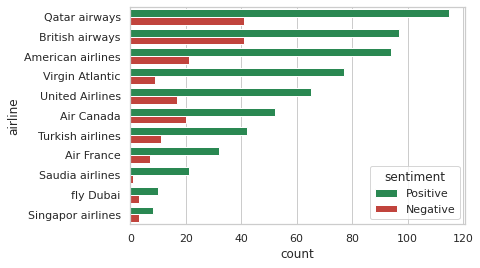

In [26]:
#pos green neg red and put % and sort pos and title airline change y
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=airline, hue= 'sentiment',palette= color_list, order = airline['airline'].value_counts().index)

The bar chart show us that in the both airlines the positive sentiment is more than negative and neutral sentiment with roughly 1100 tweets for Saudia Airlines and almost 180 tweets for flynas.

In [ ]:
def createWrdCloudForSentiment(sentiment):
    temp_df = airline[airline.sentiment==sentiment]
    words = " ".join(temp_df.reason)
    
    wrdcld = WordCloud(background_color='white',
                      width=1500,
                      height=1000).generate(words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

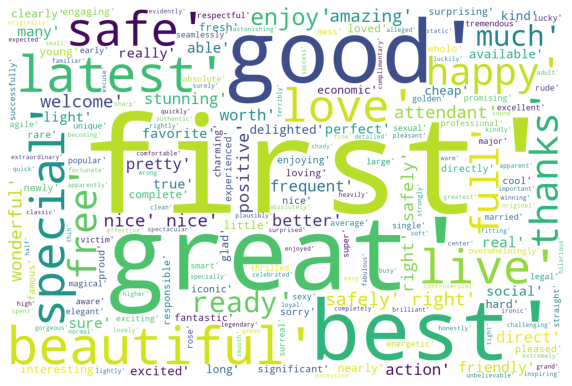

In [ ]:
createWrdCloudForSentiment('Positive')

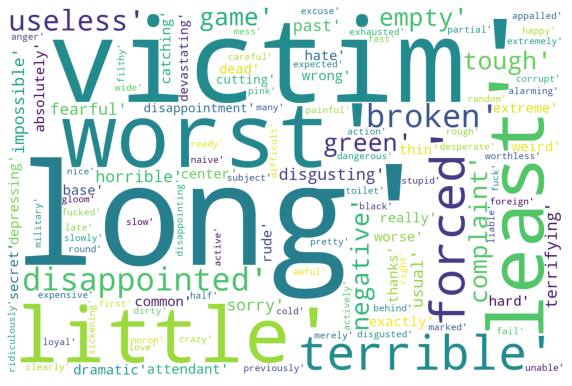

In [ ]:
createWrdCloudForSentiment('Negative')

#Count each reason

This plot shows that most of the tweets are positive since first, great, nice, etc are positive words.

In [28]:
#you have to remove na values first
airline['reason'] = airline['reason'].apply(eval)

In [29]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

Text(0.5, 1.0, 'Reasons')

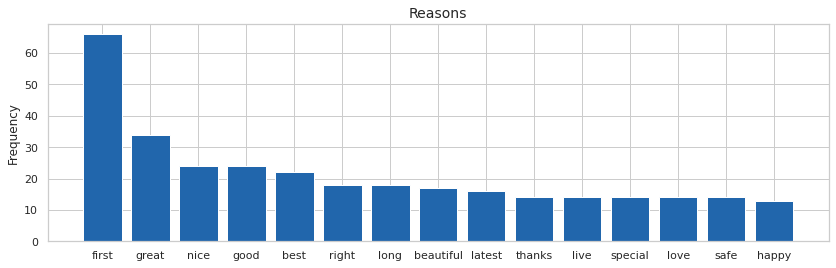

In [30]:
#
n = 15
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(airline['reason']).value_counts()[:n].index, 
       to_1D(airline['reason']).value_counts()[:n].values, color = one_color)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Reasons", size = 14)

#search for specific words to get some features about the airline

- [canceled, cancellation]
- [staff, crew]
- [price, money, cheap, expensive, cost] 
- experience
- service

In [ ]:
#transfom from str to list
airline['text'] = airline['text'].apply(eval)

In [ ]:
#index so I can know the airline 
#word in text
#sentiment 
#reason
# late time waiting
#resumed, restrat
keyword_list = ['payment']
reasons_list = []
for index, airline_list in enumerate(airline['text']):
  if any(word in airline_list for word in keyword_list):
    print(airline_list, airline['sentiment'][index])
    #print(airline['airline'][index]," ", airline['sentiment'][index],airline_list)


**define function** to count the sentimnt for each airline for a number of features 

In [60]:
def getfeatures(feature, keyword_list):
  feature_dict = {}
  feature_dict['feature'] = feature
  for index, airline_list in enumerate(airline['text']):
    if any(word in airline_list for word in keyword_list):
      feature_dict.setdefault("airline", []).append(airline['airline'][index]) 
      feature_dict.setdefault("sentiment", []).append(airline['sentiment'][index])
      #feature_dict.setdefault("reason", []).append(airline['reason'][index])
  feature_df = pd.DataFrame.from_dict(feature_dict)
  #feature_group = feature_df.groupby(['airline','sentiment']).sentiment.count().unstack()
  return feature_df


**cancel**

The bar chart demonstrates that British airways is the highest airline in cancelling flights(2 tweets complain). However, the people does not complain about cancelling flights in United airlines and Air Canada (2 tweets).

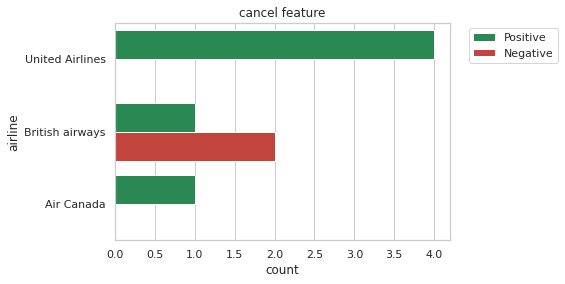

In [88]:
cancel_results = getfeatures("cancel", ['canceled', 'cancellation'])
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=cancel_results, hue= 'sentiment',palette= color_list, order = cancel_results['airline'].value_counts().index)
plt.title('cancel feature')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [ ]:
#cancel_results = getfeatures("cancel", ['canceled', 'cancellation'])
#cancel_results.plot(kind='bar', color = ['#d73027', '#1a9850'])
#plt.title('cancel feature')
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**staff**

Although the polt shows that the staff in the all the four airlines but American airlines is the best with 2 positive tweets.

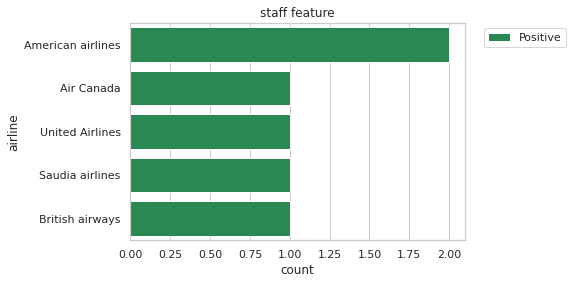

In [89]:
#pos green neg red and put % and sort pos and title airline change y
staff_results = getfeatures("staff", ['staff', 'crew'])
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=staff_results, hue= 'sentiment',palette= color_list, order = staff_results['airline'].value_counts().index)
plt.title('staff feature')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**cost** 

The diagram illustrates that Air Canada has the best prices among other airlines with 5 positive tweets. 

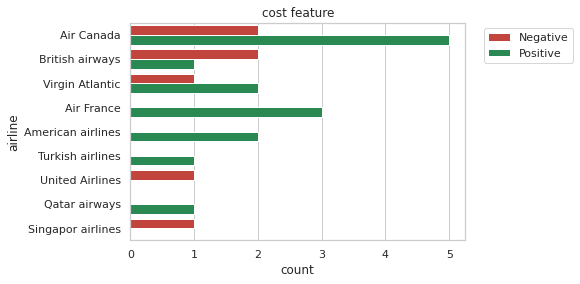

In [91]:

cost_results = getfeatures("cost", ['price', 'money', 'cheap', 'expensive', 'cost'])
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=cost_results, hue= 'sentiment',palette= ['#d73027', '#1a9850'], order = cost_results['airline'].value_counts().index)
plt.title('cost feature')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**service**

The bar chart shows that the worst services are in Qatar airways with 6 negative tweets. In the other hand, the best services are in Air Canada, British airways, and United airlines with three positive tweets.

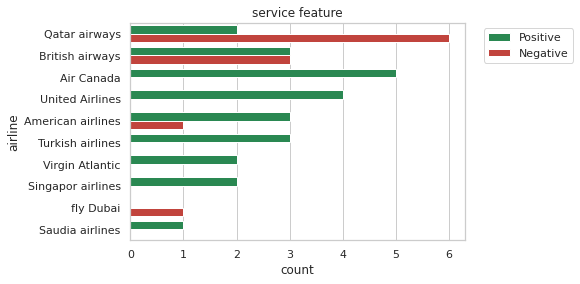

In [97]:
service_results = getfeatures("service", ['service', 'cabin crew', 'friendly' , 'customer srvice'])
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=service_results, hue= 'sentiment',palette= color_list, order = service_results['airline'].value_counts().index)
plt.title('service feature')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**experience**

The diagram illustrates that there are 4 tweets for a positive experience in Air Canada, making it the best airlines. However, there is one tweet complain about a bad experience in American Airlines and Qatar airways.

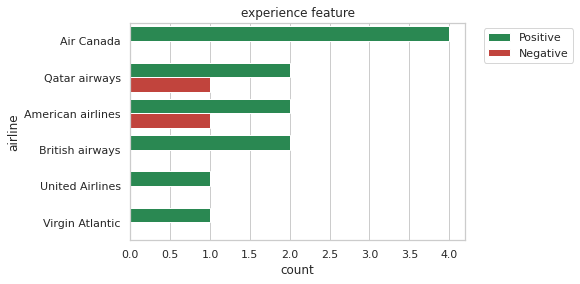

In [96]:
experience_results = getfeatures("experience", ['experience'])
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",data=experience_results, hue= 'sentiment',palette= color_list, order = experience_results['airline'].value_counts().index)
plt.title('experience feature')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

#Correlation

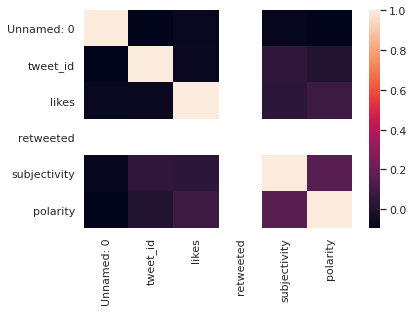

In [ ]:
sns.heatmap(airline.corr())
plt.show()

The correlation plot demonstrates that **retweeted** varible is **highly correlated** with all other variables. Thus, we are going to **delete** it. 

In [ ]:
airline = airline.drop(['retweeted'], axis=1)

In [ ]:
airline.sample(5)

,Unnamed: 0,tweet_id,text,likes,airline,string_text,subjectivity,polarity,sentiment,reason
531,1209,1334554225720877057,"[people, still, awaiting, refund, airway, goin...",1,British airways,people still awaiting refund airway going back...,0.100000,0.100,Positive,['legal']
437,967,1336966770914017280,"[youngest, ever, flight, attendant, follow, ai...",0,British airways,youngest ever flight attendant follow airworld...,0.400000,0.200,Positive,['attendant']
749,1767,1336197873189339136,"[happy, international, civil, aviation, intern...",0,Air Canada,happy international civil aviation internation...,0.500000,0.400,Positive,['happy']
683,1587,1336634206626189312,"[great, airline, shot, airbus, airfrance, cont...",0,Air France,great airline shot airbus airfrance content,0.750000,0.800,Positive,['great']
593,1373,1336333006781304834,"[first, airliner, ever, flew, american, americ...",0,American airlines,first airliner ever flew american americanairl...,0.166667,0.125,Positive,['first']


#Save the dataset

In [ ]:
airline.to_csv('airline_EDA.csv')
!cp airline_EDA.csv "./gdrive/My Drive/datasets/new_datasets/"

#**Preproccesing**

#Devide the dataset into predictors and target

In [ ]:
X = airline.iloc[:,:-1].values #all predictor columns without the target
y = airline.iloc[:,-1].values #last column (target)

#Encoding the independent variables

- retweeted
- location
- airline

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',
                                      OneHotEncoder(), 
                                      [2,3,4])], 
                                      remainder='passthrough')

X = ct.fit_transform(X)
X = np.array(X)
print(X)


  (0, 0)	1.0
  (0, 1)	1.0
  (0, 31)	1.0
  (0, 396)	1.3367285692722627e+18
  (0, 398)	0.9
  (1, 0)	1.0
  (1, 1)	1.0
  (1, 31)	1.0
  (1, 396)	1.3367193545373696e+18
  (1, 398)	0.9
  (2, 0)	1.0
  (2, 1)	1.0
  (2, 211)	1.0
  (2, 396)	1.336711502087254e+18
  (3, 0)	1.0
  (3, 1)	1.0
  (3, 131)	1.0
  (3, 396)	1.336705261340332e+18
  (3, 398)	0.6375
  (4, 0)	1.0
  (4, 1)	1.0
  (4, 32)	1.0
  (4, 396)	1.3366930422254838e+18
  (4, 398)	0.9
  (5, 0)	1.0
  :	:
  (1563, 396)	1.3112394549553766e+18
  (1564, 0)	1.0
  (1564, 2)	1.0
  (1564, 197)	1.0
  (1564, 396)	1.3112326330583409e+18
  (1565, 0)	1.0
  (1565, 2)	1.0
  (1565, 330)	1.0
  (1565, 396)	1.311186912451928e+18
  (1565, 398)	0.375
  (1566, 0)	1.0
  (1566, 2)	1.0
  (1566, 202)	1.0
  (1566, 396)	1.310945894389424e+18
  (1566, 398)	0.375
  (1567, 0)	1.0
  (1567, 2)	1.0
  (1567, 140)	1.0
  (1567, 396)	1.310905077364908e+18
  (1567, 398)	0.6375
  (1568, 0)	1.0
  (1568, 2)	1.0
  (1568, 138)	1.0
  (1568, 396)	1.3108723485732618e+18
  (1568, 398)	0.63

#Encoding the dependent variables





In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[2 2 1 ... 1 2 2]


#Dealing with datetime

In [ ]:
from datetime import datetime
for date in saudia_airlines.iloc[:,0]:
  datetime_object = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

In [ ]:
saudia_airlines.iloc[:,0]

0       2020-12-06 01:21:16
1       2020-12-05 21:37:29
2       2020-12-05 21:24:45
3       2020-12-05 20:36:03
4       2020-12-05 20:07:02
               ...         
1459    2020-10-25 13:13:11
1460    2020-10-25 13:13:05
1461    2020-10-25 13:13:00
1462    2020-10-25 12:18:46
1463    2020-10-25 12:13:41
Name: created_at, Length: 1464, dtype: object

#Extracting Features from Cleaned Tweets

https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/



CounterVectorizer method needs a list of strings and not tokens.*italicized text*

#Model calibration

https://towardsdatascience.com/classifier-calibration-7d0be1e05452

Let us now plot the Kernel Density Estimation for the two classifiers.

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(probs_lgr, label='Logistic regression')
sns.kdeplot(preds_svc, label='SVM')
plt.title("Probability Density Plot for 2 Classifiers")
plt.show()

let us check the AUC-ROC curve for the two binary classifiers, but this time using the probabilities we calculated for the SVM.

ValueError: ignored

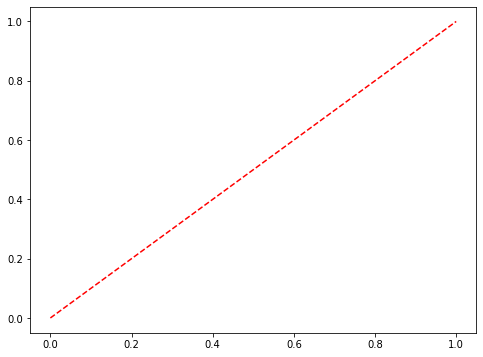

In [ ]:
from sklearn import metrics


plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1],'r--')

pred = lg_lbl_pred
label = y
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr, tpr, label=f'Logistic regression, auc = {str(round(auc,3))}')

pred = probs_svc
fpr, tpr, thresh = metrics.roc_curve(label, pred)
auc = metrics.roc_auc_score(label, pred)
plt.plot(fpr, tpr, label=f'SVC, auc = {str(round(auc,3))}')

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("AUC-ROC for two models")
plt.legend()
plt.show()

To plot the calibration curve of each classifier we define a utility function like the one below.


In [ ]:
from sklearn.calibration import calibration_curve


def plot_calibration_curve(name, fig_index, probs):
    """Plot calibration curve for est w/o and with calibration. """

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    
    frac_of_pos, mean_pred_value = calibration_curve(y_test, probs, n_bins=10)

    ax1.plot(mean_pred_value, frac_of_pos, "s-", label=f'{name}')
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title(f'Calibration plot ({name})')
    
    ax2.hist(probs, range=(0, 1), bins=10, label=name, histtype="step", lw=2)
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")

In [ ]:
# plot calibration curve for logistic regression
plot_calibration_curve("Logistic regression", 1, probs_lgr)

In [ ]:
# plot calibration curve for the SVM
plot_calibration_curve("SVM", 1, probs_svc)

#Calibrating the model

The two most popular methods of calibrating a machine learning model are the isotonic and Platt's method.

In [ ]:
from sklearn.calibration import CalibratedClassifierCV


lgr = LogisticRegression(C=1, solver='lbfgs')
svc = SVC(max_iter=10000, probability=True)

platts_scaling = CalibratedClassifierCV(svc, cv=2, method='sigmoid')
platts_scaling.fit(X_train, y_train)
calibrated_probs = platts_scaling.predict_proba(X_test)[:,1]

plot_calibration_curve("SVM", 3, calibrated_probs)

#Test-Train split

70% train
30# test

In [ ]:
train_df, test_df = train_test_split(airline, test_size=0.3, random_state=42)

In [ ]:
train_tweets =[]
for tweet in train_df.nonstop_documents:
    train_tweets.append(tweet)
    
test_tweets =[]
for tweet in test_df.nonstop_documents:
    test_tweets.append(tweet)

#TF-IDF Features

This method  is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account, not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

In [ ]:
# bag of words model
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(train_tweets)
test_tfidf_model = vectorizer.transform(test_tweets)

In [ ]:
# let's look at the dataframe
train_tfidf = pd.DataFrame(train_tfidf_model.toarray(), columns=vectorizer.get_feature_names())
train_tfidf

,aasif,abha,abith,according,add,added,administration,adult,agency,ahmed,aircraft,airline,airport,airshow,aliimran,allow,allowance,allowed,aloufi,alq,also,always,amendment,amou,amount,amp,ann,announ,announc,announce,announced,announcement,ansaei,answer,answered,apologize,apologized,app,applica,appreciated,...,valued,vett,vi,via,virus,visa,visi,visit,visiting,voucher,wa,waseem,wasik,websit,website,weekly,weight,welcome,weve,wide,wifi,wish,within,without,work,working,world,worldwide,would,yes,youre,yqhlhvzmdf,zafarx,zam,zuel,الخطوطالسعودية,اليومالعالميلذويالإعاقة,بكل,حب,نخدمكم
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.33312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.33312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.411499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Dealing with imbalance data

https://towardsdatascience.com/how-to-deal-with-imbalanced-data-34ab7db9b100

Since, as explained above, accuracy isn’t a good measure when working with imbalanced datasets, let’s consider more appropriate measures.

Precision: True Positives / All Predicted Positives = TP / (TP+FP). Precision is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.


Recall: True Positives / All actual positives = TP / (TP + FN). Recall is a measure of a classifier’s completeness. It is also the same as Sensitivity or the True positive rate. Low recall indicates a high number of false negatives.


F1 score: 2TP/(2TP + FP + FN) A weighted average of precision and recall. If we wanted a balance between precision and recall then we’d look at F1 score.


#Attempt five models

- Logistic Regression,
- MultinomialNB
- DecisionTreeClassifier
- RandomForestClassifier
- KNeighborsClassifier

In [ ]:
cls = [LogisticRegression(),
       MultinomialNB(), 
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=200),
       KNeighborsClassifier(n_neighbors = 5)]

cls_name = []

In [ ]:
lbl_actual = test_df.sentiment
i = 0
accuracy = []
for cl in cls:
    model = cl.fit(train_tfidf_model,train_df.sentiment)
    lbl_pred = model.predict(test_tfidf_model)
    a = (100*accuracy_score(lbl_pred, lbl_actual))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, lbl_actual))
    i +=1

LogisticRegression  Accuracy Score : 96.6%
              precision    recall  f1-score   support

    Negative       0.88      1.00      0.93        28
     Neutral       0.85      1.00      0.92        69
    Positive       1.00      0.96      0.98       374

    accuracy                           0.97       471
   macro avg       0.91      0.99      0.94       471
weighted avg       0.97      0.97      0.97       471

MultinomialNB  Accuracy Score : 94.27%
              precision    recall  f1-score   support

    Negative       0.91      1.00      0.95        29
     Neutral       0.72      0.98      0.83        59
    Positive       1.00      0.93      0.96       383

    accuracy                           0.94       471
   macro avg       0.87      0.97      0.91       471
weighted avg       0.96      0.94      0.95       471

DecisionTreeClassifier  Accuracy Score : 98.09%
              precision    recall  f1-score   support

    Negative       0.94      0.97      0.95        31

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

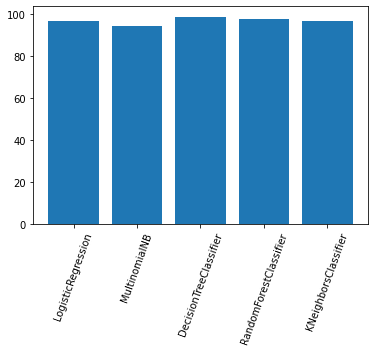

In [ ]:
plt.bar(cls_name, accuracy)
plt.xticks(rotation=70)

DecisionTreeClassifier is the best classifier with 98.73% accuracy

In [ ]:
# Save to csv

lg_model = DecisionTreeClassifier().fit(train_tfidf_model,train_df.sentiment)
lg_lbl_pred = model.predict(test_tfidf_model)

In [ ]:
lg_lbl_pred_df = pd.DataFrame({'tweet_id': test_df.tweet_id,
                            'text' : test_df.nonstop_documents,
                            'lg_reg' : lg_lbl_pred})
lg_lbl_pred_df.head()

,tweet_id,text,lg_reg
1412,1327725448273522688,greeting kindly provide u booking reference p...,Positive
985,1322637029822337027,dear guest information travel guideline requi...,Positive
432,1328395406150078470,dear guest please review saudia website fligh...,Neutral
964,1322732128900124672,dear guest flight india saudi arabia time kin...,Positive
1169,1321438810673238016,dear guest kindly check flight schedule choos...,Positive


In [ ]:
lg_lbl_pred_df.to_csv('airline_prediction.csv')
!cp airline_prediction.csv "./gdrive/My Drive/datasets/twitter_analysis/"

#ROC
Sensitivity/Specificity from ROC Curve: The Sensitivity is basically the same as recall and tells us the True Positive Rate.

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
lg_model = DecisionTreeClassifier().fit(train_tfidf_model,train_df.sentiment)


In [ ]:
lg_lbl_pred = model.predict(test_tfidf_model)

In [ ]:
probs = model.predict_proba(test_tfidf_model)

In [ ]:
probs = probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_tfidf_model, probs)
print('AUC: %.2f' % auc)

TypeError: ignored

#make the airline is the target

In [ ]:
lbl_actual = test_df.airline
i = 0
accuracy = []
for cl in cls:
    model = cl.fit(train_tfidf_model,train_df.airline)
    lbl_pred = model.predict(test_tfidf_model)
    a = (100*accuracy_score(lbl_pred, lbl_actual))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, lbl_actual))
    i +=1

LogisticRegression  Accuracy Score : 98.73%
                precision    recall  f1-score   support

Saudi_airlines       1.00      0.99      0.99       417
        flynas       0.90      1.00      0.95        54

      accuracy                           0.99       471
     macro avg       0.95      0.99      0.97       471
  weighted avg       0.99      0.99      0.99       471

MultinomialNB  Accuracy Score : 97.88%
                precision    recall  f1-score   support

Saudi_airlines       1.00      0.98      0.99       419
        flynas       0.85      0.98      0.91        52

      accuracy                           0.98       471
     macro avg       0.92      0.98      0.95       471
  weighted avg       0.98      0.98      0.98       471

DecisionTreeClassifier  Accuracy Score : 99.36%
                precision    recall  f1-score   support

Saudi_airlines       1.00      1.00      1.00       410
        flynas       0.98      0.97      0.98        61

      accuracy       

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

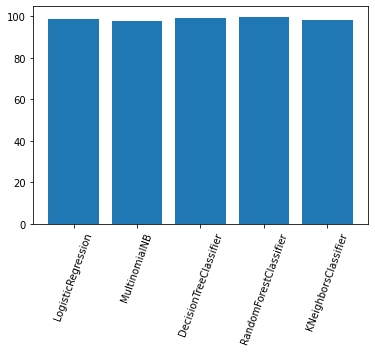

In [ ]:
plt.bar(cls_name, accuracy)
plt.xticks(rotation=70)

RandomForestClassifier predicts the airline with 99.79% accuracy